In [4]:
import utils
import skimage
import skimage.morphology
import numpy as np

import matplotlib.pyplot as plt

In [5]:
def remove_noise(im: np.ndarray) -> np.ndarray:
    """
    A function that removes noise in the input image using morphological operations.
    
    Args:
        im: np.ndarray of shape (H, W) with boolean values (dtype=bool)
    
    Returns:
        np.ndarray of shape (H, W), dtype=bool
    """
    # Step 1: Remove small foreground noise using binary opening
    B = skimage.morphology.disk(7) # Use disk shaped mask to clear objects
    cleaned_image = skimage.morphology.binary_opening(im, footprint=B)
    
    # Step 2: Fill small holes and smooth regions using binary closing
    B = skimage.morphology.disk(7) # Use disk shaped mask to dilate and smooth everything out
    cleaned_image = skimage.morphology.binary_closing(cleaned_image, footprint=B)
    
    return cleaned_image


Reading image: images\noisy.png
Saving image to: image_processed\noisy-filtered.png


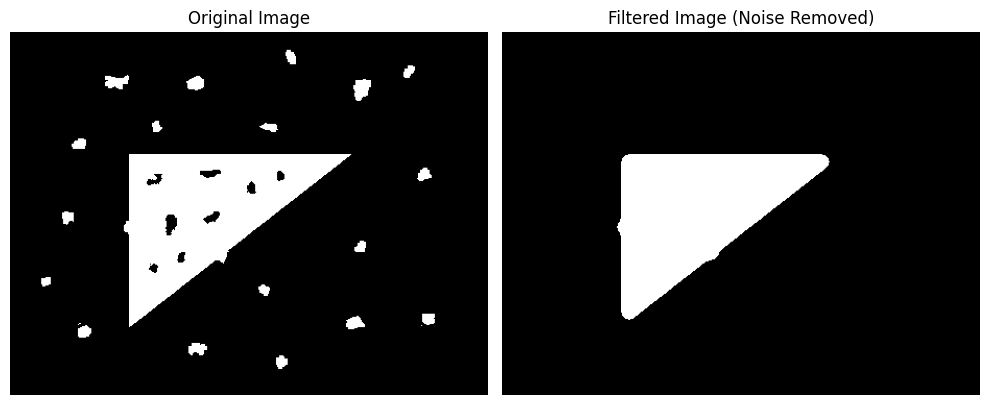

In [6]:
if __name__ == "__main__":
    # DO NOT CHANGE
    im = utils.read_image("noisy.png")

    binary_image = (im != 0)  # Convert to boolean binary image
    noise_free_image = remove_noise(binary_image)

    # Assertions
    assert im.shape == noise_free_image.shape, "Expected image shape ({}) to be same as resulting image shape ({})".format(
            im.shape, noise_free_image.shape)
    assert noise_free_image.dtype == bool, "Expected resulting image dtype to be bool. Was: {}".format(
            noise_free_image.dtype)

    # Save the filtered image
    noise_free_image = utils.to_uint8(noise_free_image)
    utils.save_im("noisy-filtered.png", noise_free_image)

    # Display original and filtered images
    plt.figure(figsize=(10, 5))
    
    # Original Binary Image
    plt.subplot(1, 2, 1)
    plt.imshow(binary_image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")
    
    # Noise-Free Image
    plt.subplot(1, 2, 2)
    plt.imshow(noise_free_image, cmap="gray")
    plt.title("Filtered Image (Noise Removed)")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()
